In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['users.dat', 'ratings.dat', 'movies.dat']


In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

**1.  Data acquisition of the movielens dataset**

In [3]:
#Data acquisition of the movies dataset
df_movie=pd.read_csv('../input/movies.dat', sep = '::', engine='python')
df_movie.columns =['MovieIDs','MovieName','Category']
df_movie.dropna(inplace=True)
df_movie.head()

,MovieIDs,MovieName,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [4]:
#Data acquisition of the rating dataset
df_rating = pd.read_csv("../input/ratings.dat",sep='::', engine='python')
df_rating.columns =['ID','MovieID','Ratings','TimeStamp']
df_rating.dropna(inplace=True)
df_rating.head()

,ID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [5]:
#Data acquisition of the users dataset
df_user = pd.read_csv("../input/users.dat",sep='::',engine='python')
df_user.columns =['UserID','Gender','Age','Occupation','Zip-code']
df_user.dropna(inplace=True)
df_user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [6]:
df = pd.concat([df_movie, df_rating,df_user], axis=1)
df.head()

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117


**2.  Perform the Exploratory Data Analysis (EDA) for the users dataset**

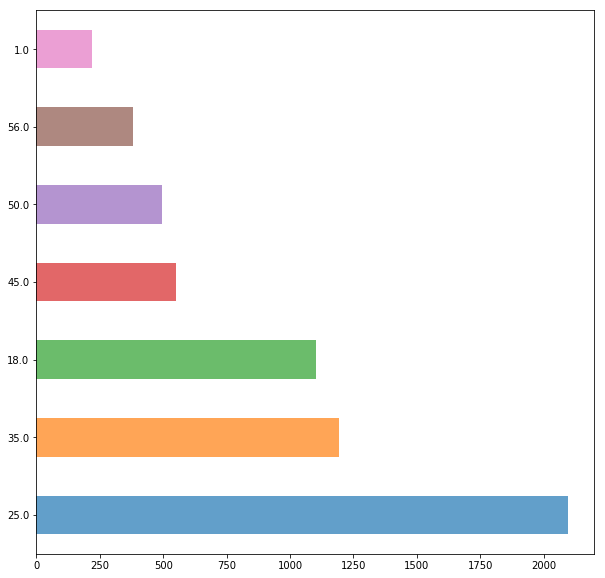

In [7]:
#Visualize user age distribution
df['Age'].value_counts().plot(kind='barh',alpha=0.7,figsize=(10,10))
plt.show()

Text(0.5, 0, 'Age')

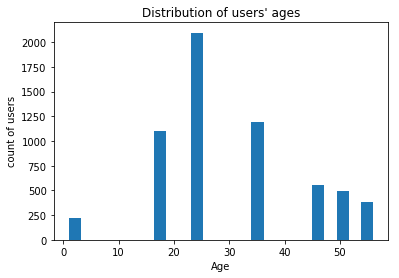

In [8]:
df.Age.plot.hist(bins=25)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('Age')

In [9]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['age_group'] = pd.cut(df.Age, range(0, 81, 10), right=False, labels=labels)
df[['Age', 'age_group']].drop_duplicates()[:10]

,Age,age_group
0,56.0,50-59
1,25.0,20-29
2,45.0,40-49
4,50.0,50-59
5,35.0,30-39
16,18.0,10-19
17,1.0,0-9
6039,NaN,NaN


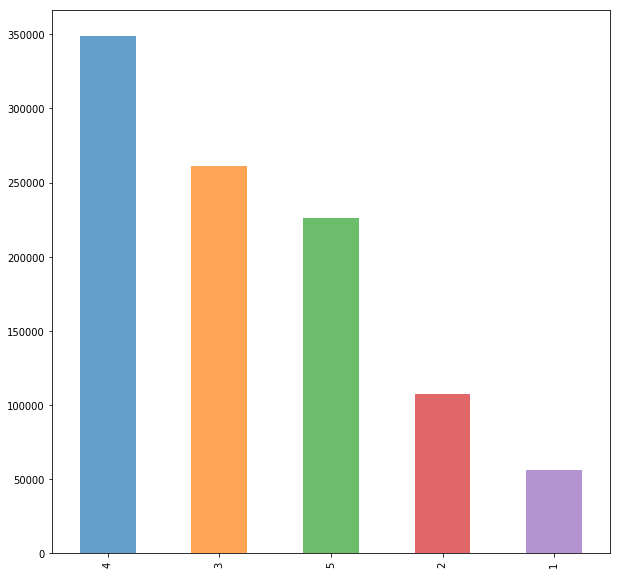

In [10]:
#Visualize overall rating by users
df['Ratings'].value_counts().plot(kind='bar',alpha=0.7,figsize=(10,10))
plt.show()

In [11]:
groupedby_movieName = df.groupby('MovieName')
groupedby_rating = df.groupby('Ratings')
groupedby_uid = df.groupby('UserID')
#groupedby_age = df.loc[most_50.index].groupby(['MovieName', 'age_group'])

In [12]:
movies = df.groupby('MovieName').size().sort_values(ascending=True)[:1000]
print(movies)

MovieName
$1,000,000 Duck (1971)                                              1
Only Angels Have Wings (1939)                                       1
Only You (1994)                                                     1
Open Season (1996)                                                  1
Open Your Eyes (Abre los ojos) (1997)                               1
Operation Condor (Feiying gaiwak) (1990)                            1
Operation Condor 2 (Longxiong hudi) (1990)                          1
Operation Dumbo Drop (1995)                                         1
Opportunists, The (1999)                                            1
Opposite of Sex, The (1998)                                         1
Ordinary People (1980)                                              1
Orgazmo (1997)                                                      1
Original Gangstas (1996)                                            1
Onegin (1999)                                                       1
Original K

In [13]:
ToyStory_data = groupedby_movieName.get_group('Toy Story 2 (1999)')
ToyStory_data.shape

(1, 13)

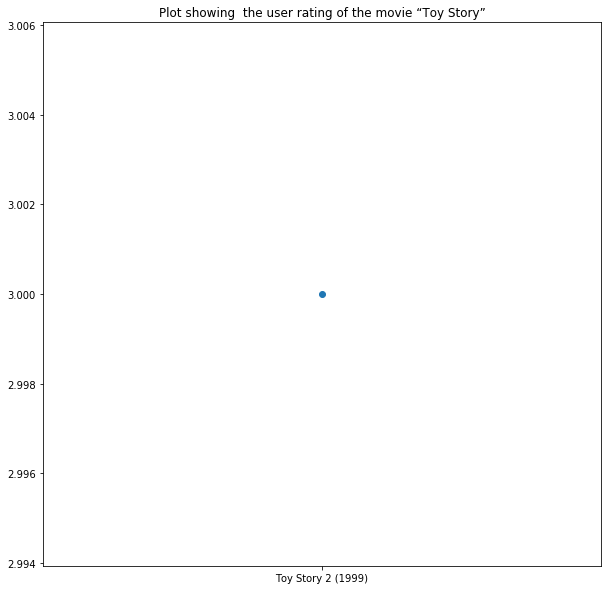

In [14]:
#Find and visualize the user rating of the movie “Toy Story”
plt.figure(figsize=(10,10))
plt.scatter(ToyStory_data['MovieName'],ToyStory_data['Ratings'])
plt.title('Plot showing  the user rating of the movie “Toy Story”')
plt.show()


In [15]:
#Find and visualize the viewership of the movie “Toy Story” by age group
ToyStory_data[['MovieName','age_group']]

,MovieName,age_group
3044,Toy Story 2 (1999),0-9


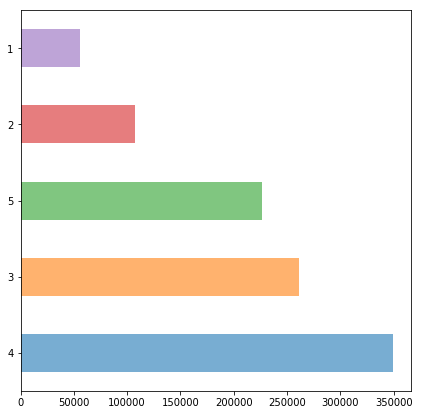

In [16]:
#Find and visualize the top 25 movies by viewership rating
top_25 = df[25:]
top_25['Ratings'].value_counts().plot(kind='barh',alpha=0.6,figsize=(7,7))
plt.show()

In [17]:
#Visualize the rating data by user of user id = 2696
userid_2696 = groupedby_uid.get_group(2696)
userid_2696[['UserID','Ratings']]

,UserID,Ratings
2694,2696.0,3


**Perform machine learning on first 500 extracted records**

In [18]:
#First 500 extracted records
first_500 = df[500:]
first_500.dropna(inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
#Use the following features:movie id,age,occupation
features = first_500[['MovieID','Age','Occupation']].values

In [20]:
#Use rating as label
labels = first_500[['Ratings']].values

In [21]:
#Create train and test data set
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)

**Perform the following: **

Text(0.5, 0, 'Ratings')

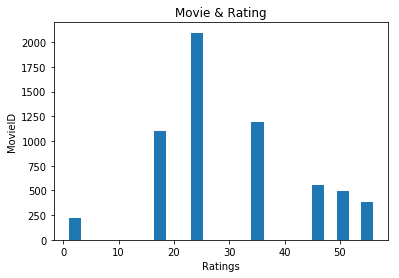

In [22]:
#Create a histogram for movie
df.Age.plot.hist(bins=25)
plt.title("Movie & Rating")
plt.ylabel('MovieID')
plt.xlabel('Ratings')

Text(0.5, 0, 'Ratings')

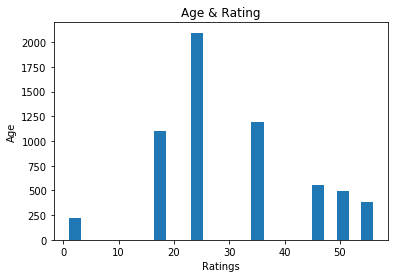

In [23]:
#Create a histogram for age
df.Age.plot.hist(bins=25)
plt.title("Age & Rating")
plt.ylabel('Age')
plt.xlabel('Ratings')

Text(0.5, 0, 'Ratings')

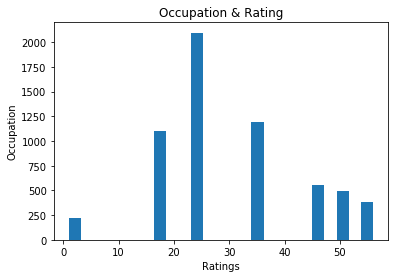

In [24]:
#Create a histogram for occupation
df.Age.plot.hist(bins=25)
plt.title("Occupation & Rating")
plt.ylabel('Occupation')
plt.xlabel('Ratings')

In [25]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(train, train_labels)
Y_pred = logreg.predict(test)
acc_log = round(logreg.score(train, train_labels) * 100, 2)
acc_log

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


32.98

In [26]:
# Support Vector Machines

svc = SVC()
svc.fit(train, train_labels)
Y_pred = svc.predict(test)
acc_svc = round(svc.score(train, train_labels) * 100, 2)
acc_svc

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


96.42

In [27]:
# K Nearest Neighbors Classifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train, train_labels)
Y_pred = knn.predict(test)
acc_knn = round(knn.score(train, train_labels) * 100, 2)
acc_knn

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


57.57

In [28]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(train, train_labels)
Y_pred = gaussian.predict(test)
acc_gaussian = round(gaussian.score(train, train_labels) * 100, 2)
acc_gaussian

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


32.23

In [29]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(train, train_labels)
Y_pred = perceptron.predict(test)
acc_perceptron = round(perceptron.score(train, train_labels) * 100, 2)
acc_perceptron

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


28.61

In [30]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(train, train_labels)
Y_pred = linear_svc.predict(test)
acc_linear_svc = round(linear_svc.score(train, train_labels) * 100, 2)
acc_linear_svc

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


29.67

In [31]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(train, train_labels)
Y_pred = sgd.predict(test)
acc_sgd = round(sgd.score(train, train_labels) * 100, 2)
acc_sgd

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


28.7

In [32]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, train_labels)
Y_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(train, train_labels) * 100, 2)
acc_decision_tree

98.54

In [33]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train, train_labels)
Y_pred = random_forest.predict(test)
random_forest.score(train, train_labels)
acc_random_forest = round(random_forest.score(train, train_labels) * 100, 2)
acc_random_forest

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


98.5

In [34]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
8,Decision Tree,98.54
3,Random Forest,98.50
0,Support Vector Machines,96.42
1,KNN,57.57
2,Logistic Regression,32.98
4,Naive Bayes,32.23
7,Linear SVC,29.67
6,Stochastic Gradient Decent,28.70
5,Perceptron,28.61
